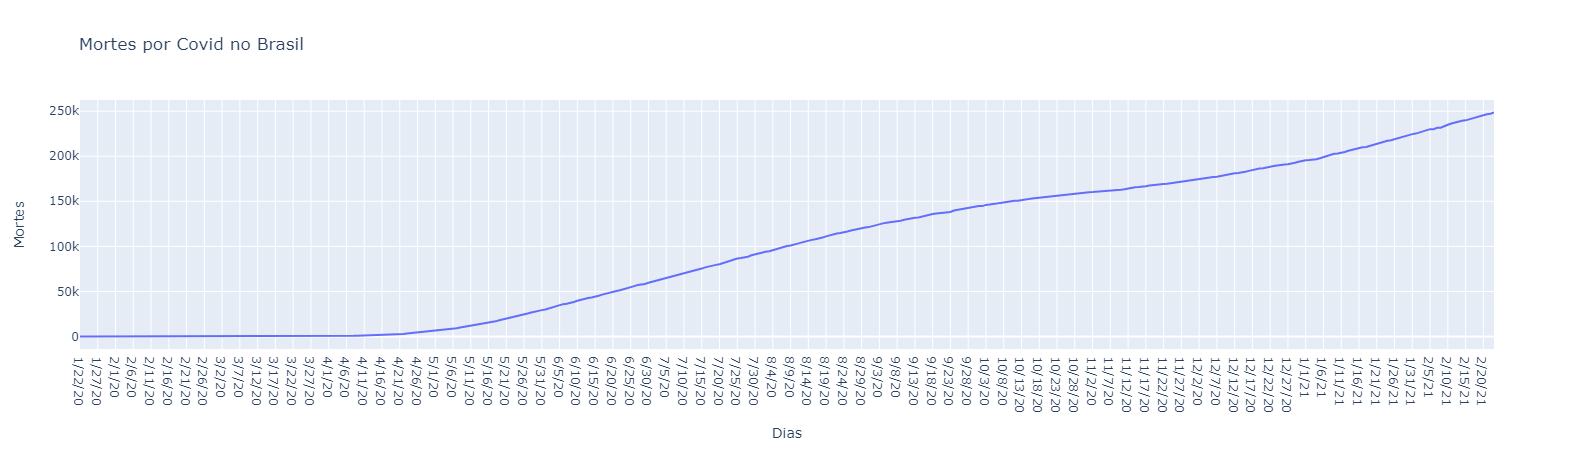

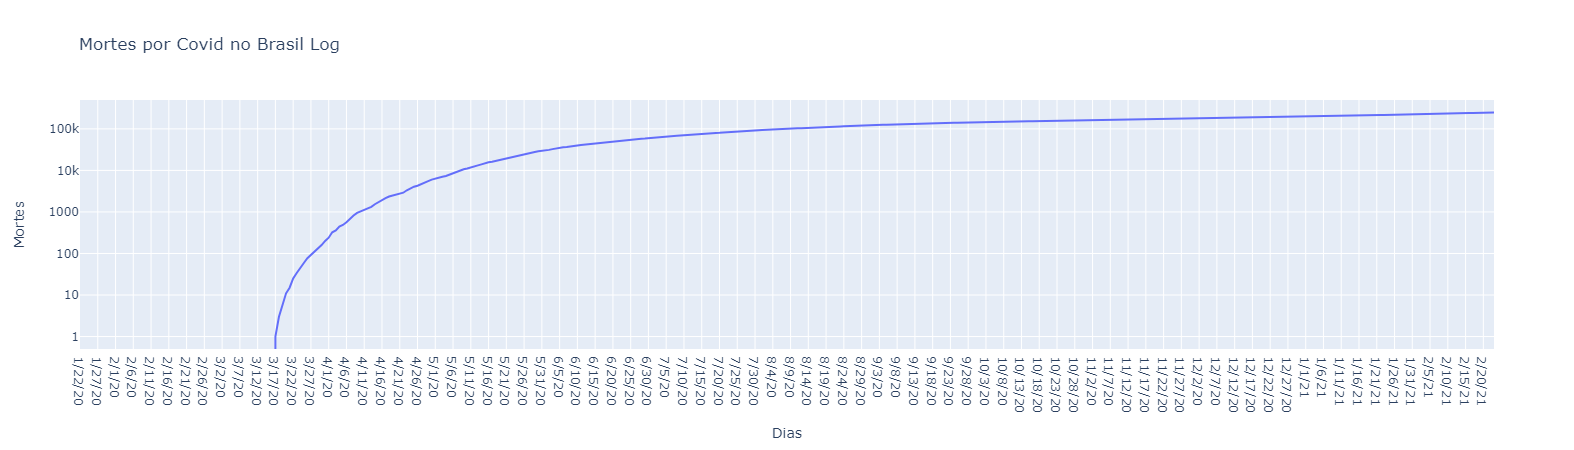

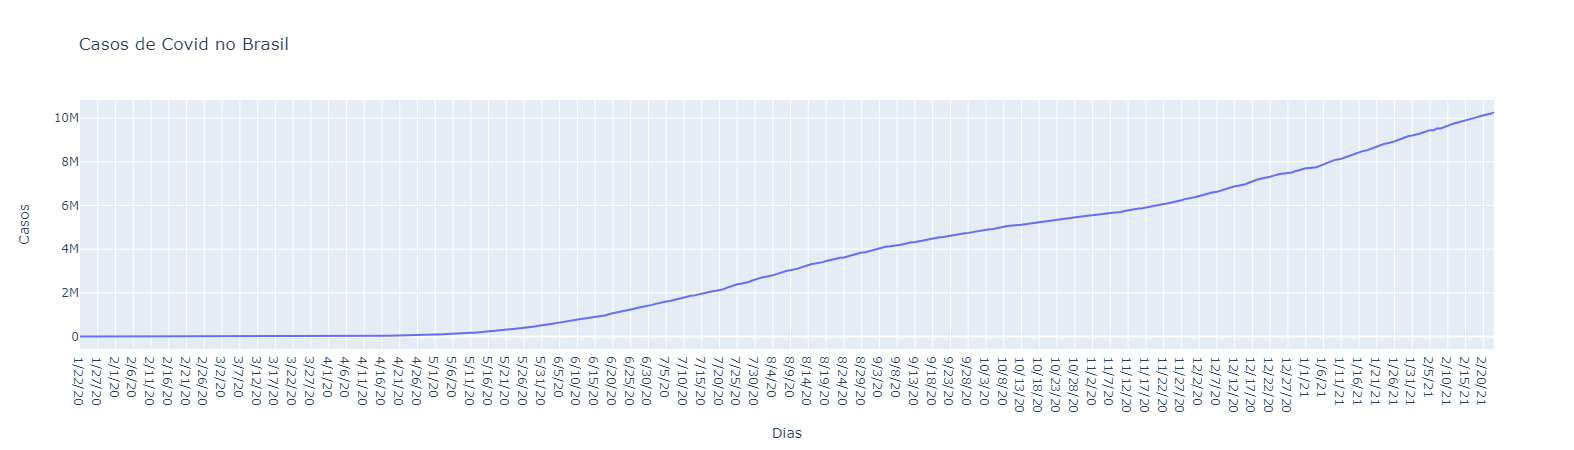

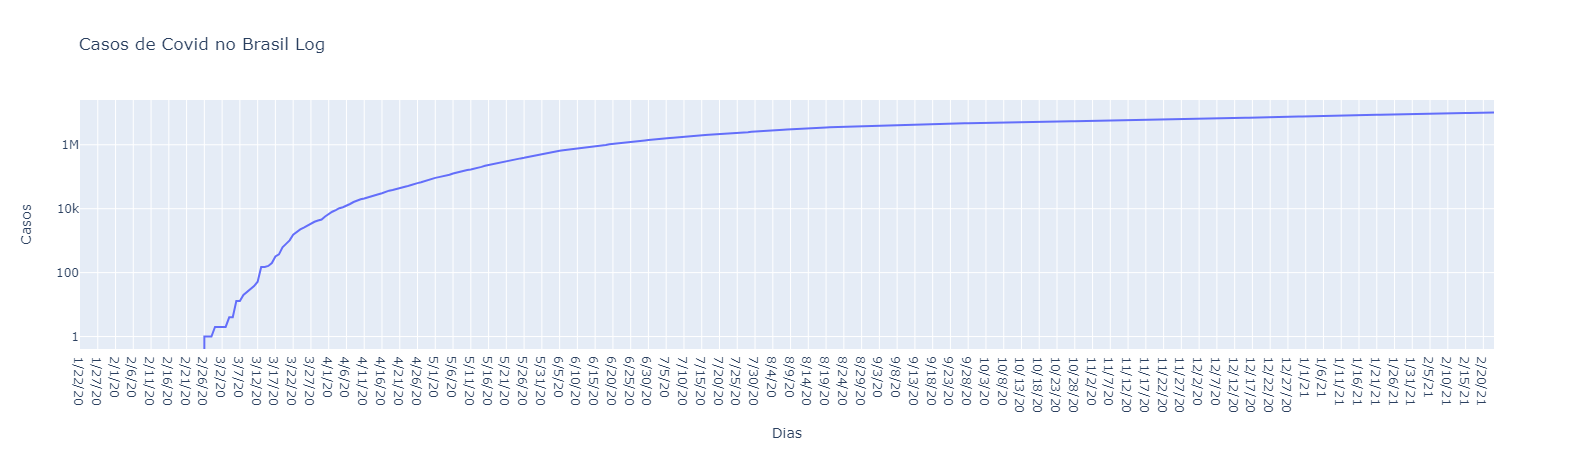

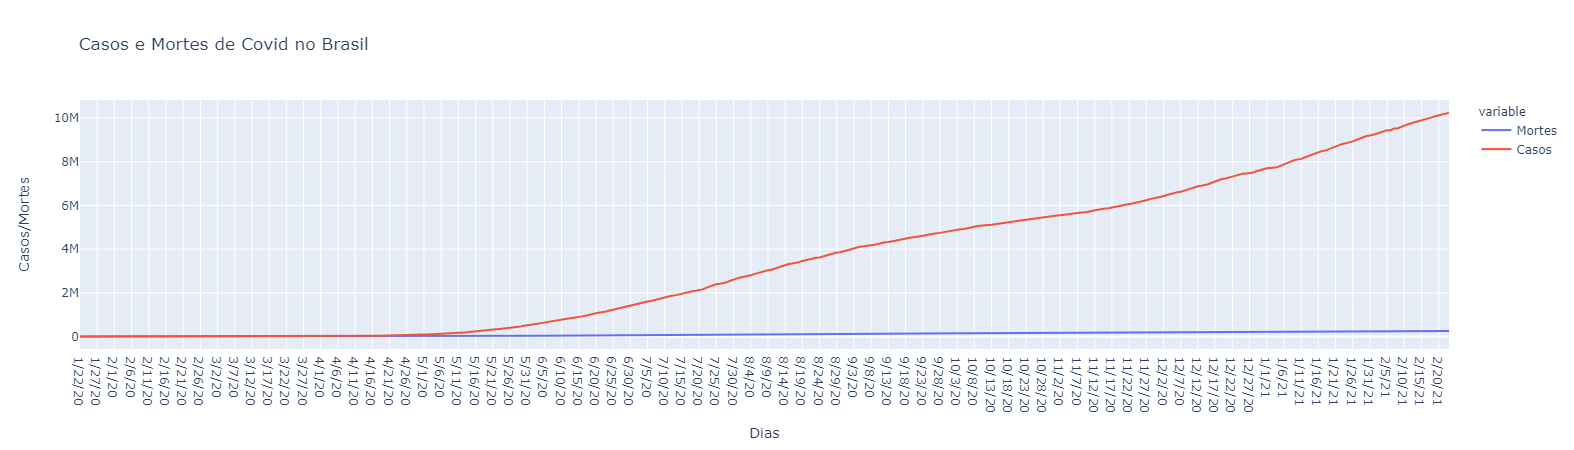

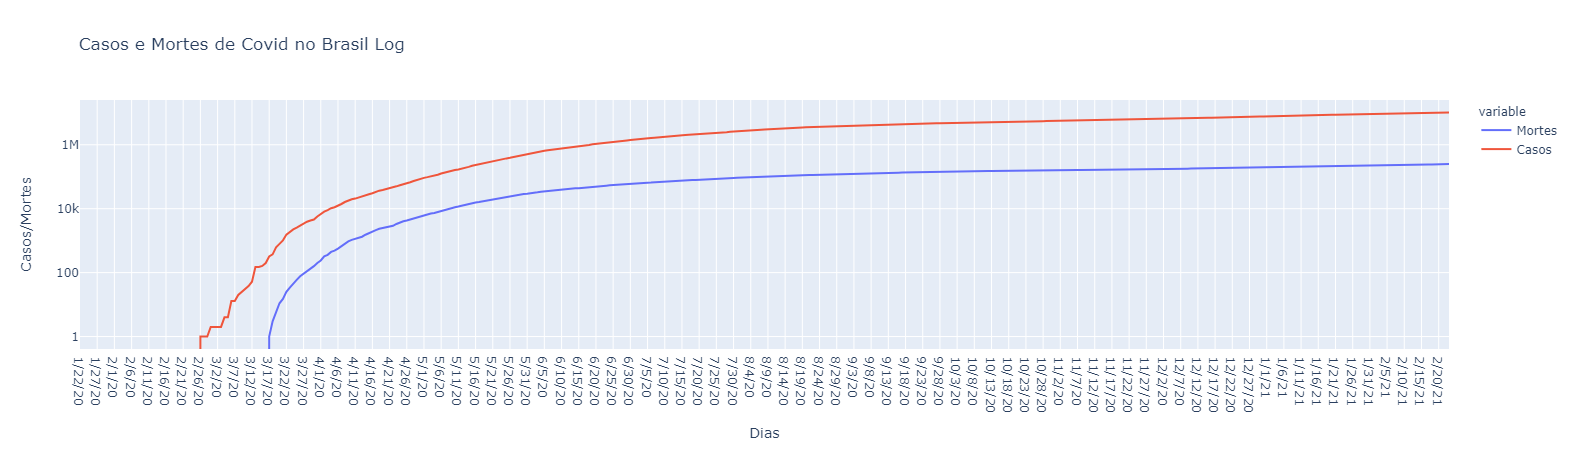

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

#from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#print(__version__)

#import cufflinks as cf
#init_notebook_mode(connected=True)
#cf.go_offline()

import seaborn as sns

import plotly.express as px

#Importação das Planilahs

covid_casos = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")
covid_mortes = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv")

#Tratamento dos dados de mortes

covid_mortes_brasil = covid_mortes[covid_mortes["Country/Region"] == "Brazil"]

covid_mortes_brasil_t = covid_mortes_brasil.transpose()

covid_mortes_brasil_t.reset_index(inplace=True)

covid_mortes_brasil_t_d=covid_mortes_brasil_t.drop([0,1,2,3])

covid_mortes_brasil_t_d_r = covid_mortes_brasil_t_d.rename(columns={"index": "Dias", 30: "Mortes"})

#covid_mortes_brasil_t_d_r.plot.line(x="Dias",y='Mortes',figsize=(12,3),lw=1)

#Plotagem dos gráficos de mortes

fig1 = px.line(covid_mortes_brasil_t_d_r, x="Dias", y="Mortes", title='Mortes por Covid no Brasil')
fig1.show()

fig2 = px.line(covid_mortes_brasil_t_d_r, x="Dias", y="Mortes", title='Mortes por Covid no Brasil Log', log_y=True)
fig2.show()

#Tratamento dos dados de casos

covid_casos_brasil = covid_casos[covid_mortes["Country/Region"] == "Brazil"]

covid_casos_brasil_t = covid_casos_brasil.transpose()

covid_casos_brasil_t.reset_index(inplace=True)

covid_casos_brasil_t_d=covid_casos_brasil_t.drop([0,1,2,3])

covid_casos_brasil_t_d_r = covid_casos_brasil_t_d.rename(columns={"index": "Dias", 30: "Casos"})

#Plotagem do gráfico de casos

fig3 = px.line(covid_casos_brasil_t_d_r, x="Dias", y="Casos", title='Casos de Covid no Brasil')
fig3.show()

fig4 = px.line(covid_casos_brasil_t_d_r, x="Dias", y="Casos", title='Casos de Covid no Brasil Log', log_y=True)
fig4.show()

#Junção de dados de mortes e casos

Casos = covid_casos_brasil_t_d_r["Casos"]
covid_casos_mortes_brasil_t_d_r = covid_mortes_brasil_t_d_r.join(Casos)

#Tratamento dos dados de mortes e casos

covid_casos_mortes_brasil_t_d_r_m=pd.melt(covid_casos_mortes_brasil_t_d_r, id_vars=['Dias'], value_vars=['Mortes', 'Casos'])

covid_casos_mortes_brasil_t_d_r_m_r = covid_casos_mortes_brasil_t_d_r_m.rename(columns={"value": "Casos/Mortes"})

#Plotagem do gráfico de mortes e casos

fig5 = px.line(covid_casos_mortes_brasil_t_d_r_m_r, x="Dias", y="Casos/Mortes",color="variable", title='Casos e Mortes de Covid no Brasil')
fig5.show()

fig6 = px.line(covid_casos_mortes_brasil_t_d_r_m_r, x="Dias", y="Casos/Mortes",color="variable", title='Casos e Mortes de Covid no Brasil Log', log_y=True)
fig6.show()